In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/'
output_path =  '/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_results/'

In [ ]:
image_path = "/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/1.jpg"
image = cv.imread("/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/1.jpg")

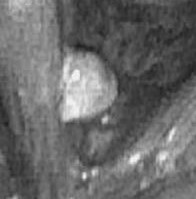

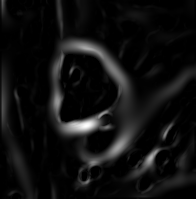

In [ ]:
import numpy as np
import cv2
from skimage.filters import frangi

# Read the input image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image to range [0, 1]
normalized_image = image.astype(float) / 255.0

# Apply the Frangi filter for vessel enhancement
vesselness = frangi(normalized_image)

# Scale the vesselness values to the range [0, 255]
scaled_vesselness = (vesselness - np.min(vesselness)) / (np.max(vesselness) - np.min(vesselness)) * 255

# Convert the scaled vesselness image to uint8
vesselness_image = scaled_vesselness.astype(np.uint8)

# Display the original and vesselness-enhanced images
cv2_imshow(image)
cv2_imshow(vesselness_image)

In [ ]:
original_images =[]
output_images =[]

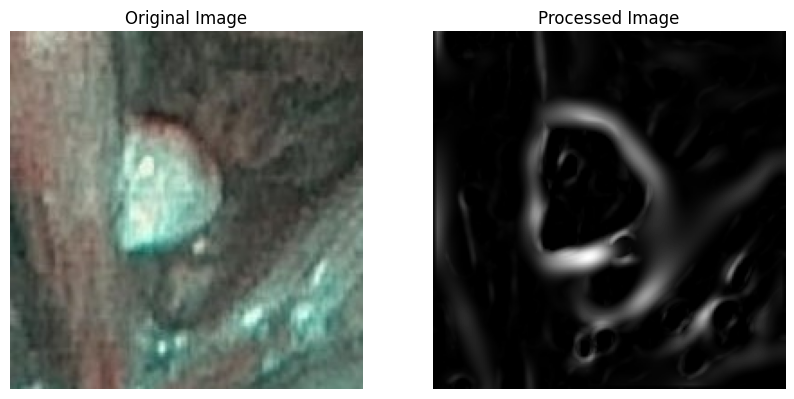

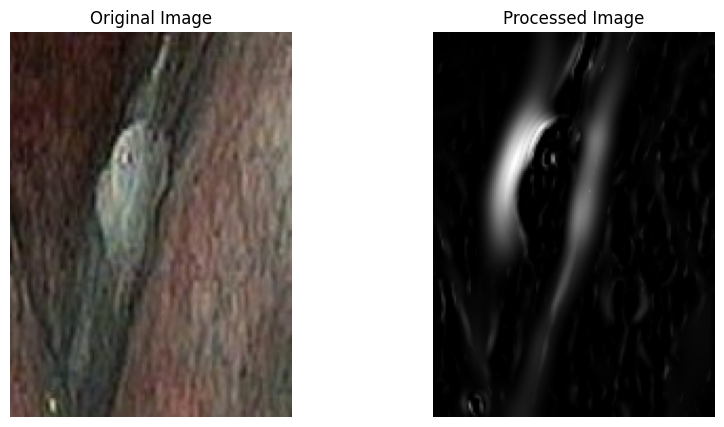

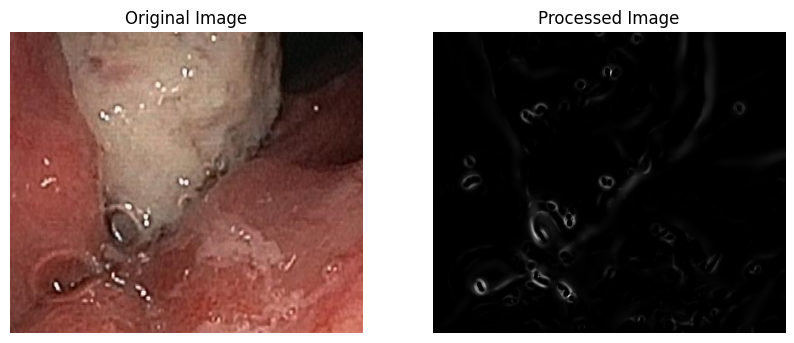

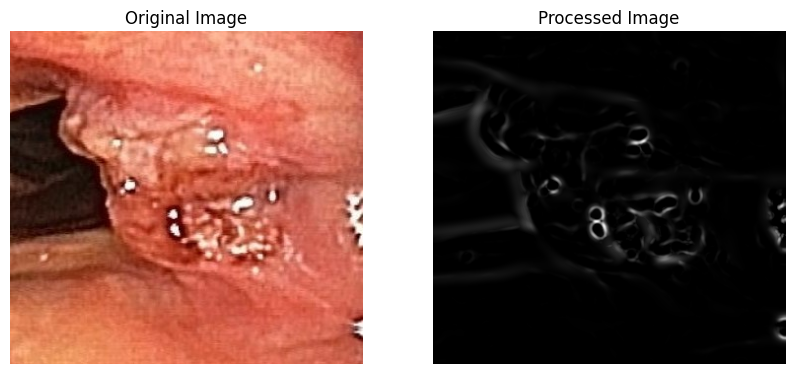

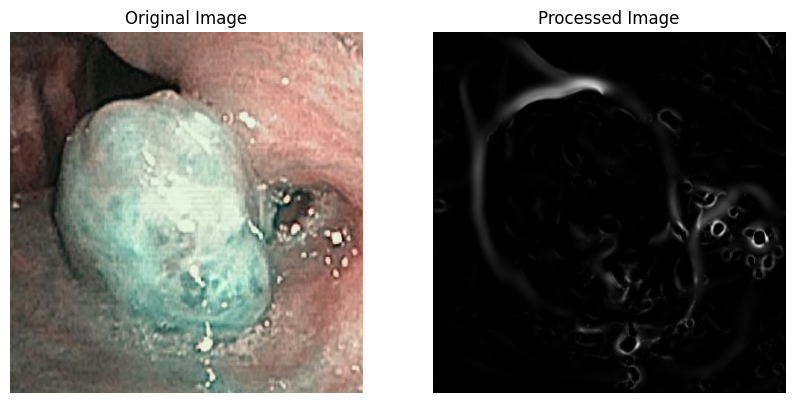

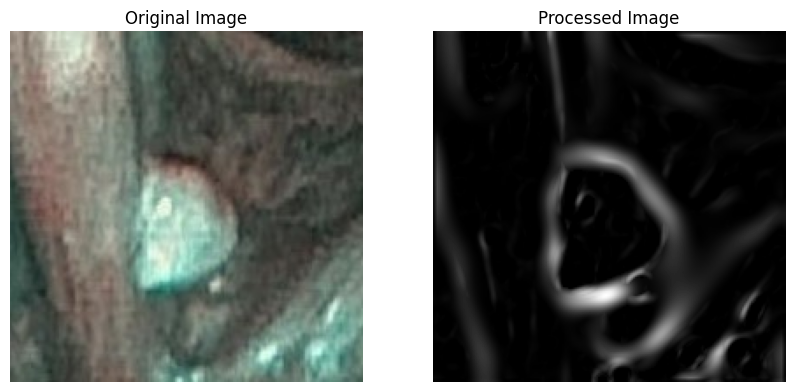

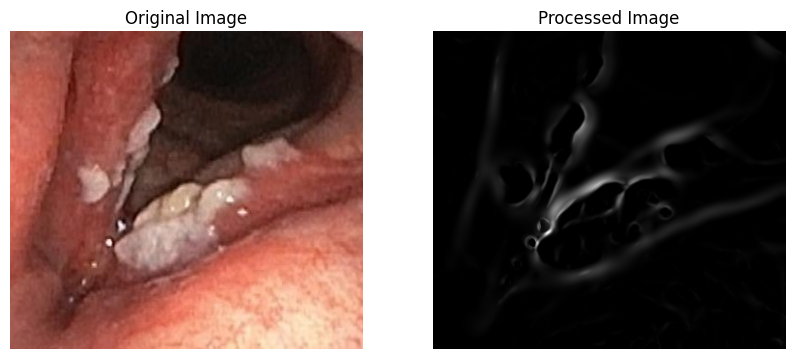

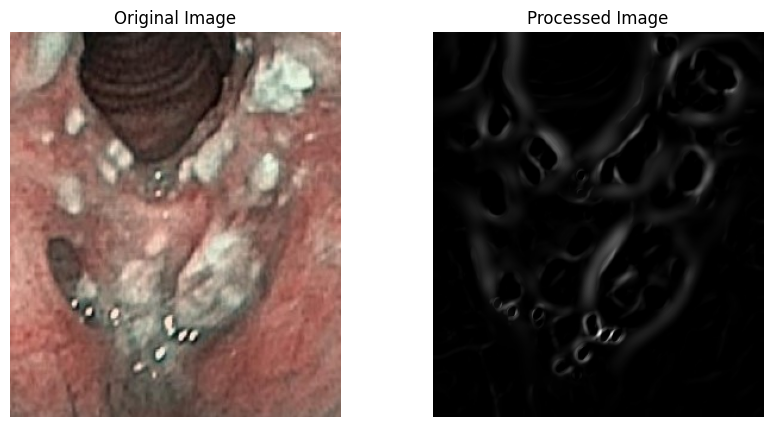

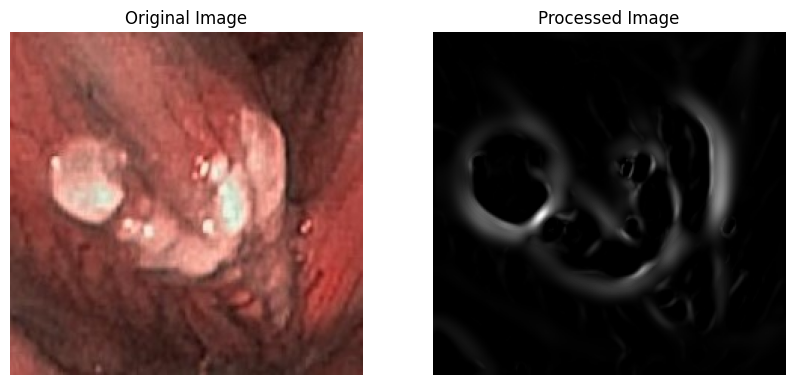

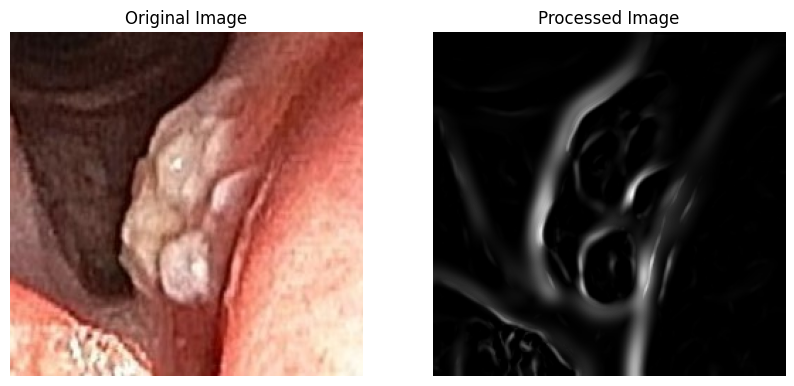

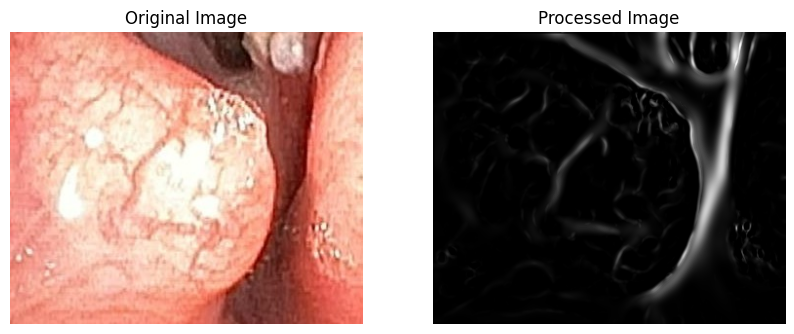

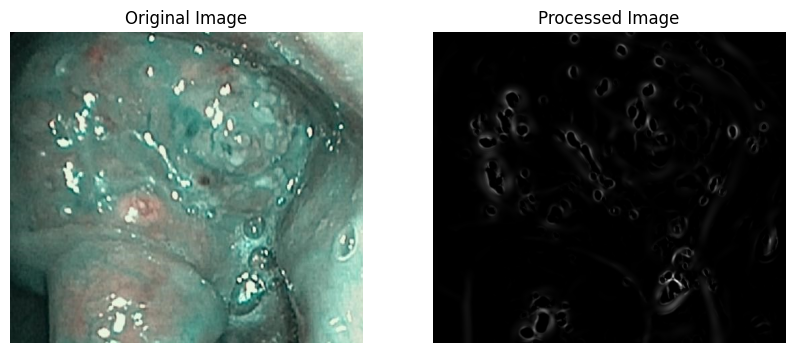

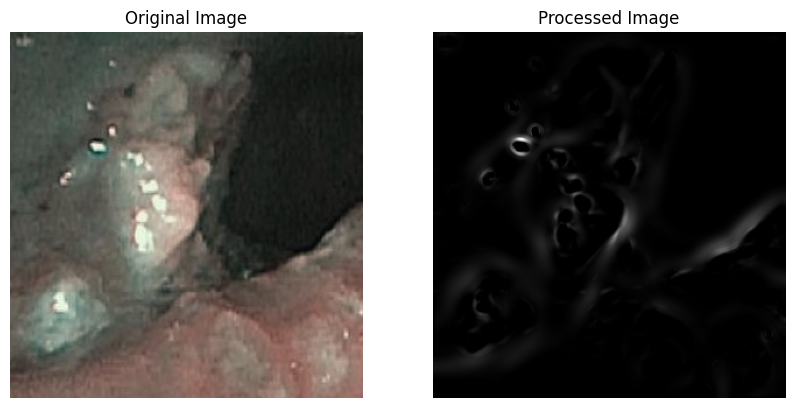

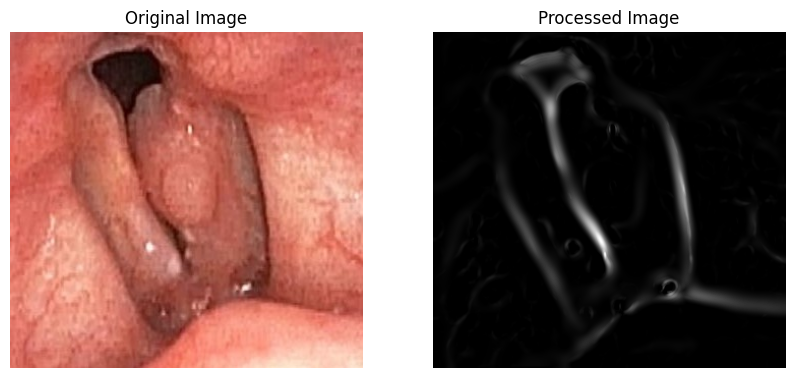

In [ ]:
for im in os.listdir(dir_path):

  # Read the input image
  img = cv2.imread(dir_path + im, cv2.IMREAD_GRAYSCALE)
  original_images.append(img)

  # Normalize the image to range [0, 1]
  normalized_image = img.astype(float) / 255.0

  # Apply the Frangi filter for vessel enhancement
  vesselness = frangi(normalized_image)

  # Scale the vesselness values to the range [0, 255]
  scaled_vesselness = (vesselness - np.min(vesselness)) / (np.max(vesselness) - np.min(vesselness)) * 255

  # Convert the scaled vesselness image to uint8
  out_img = scaled_vesselness.astype(np.uint8)
  output_images.append(out_img)

  # Display img and out_img side by side
  img1 = cv2.imread(dir_path+im)
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')
  axes[0].axis('off')
  axes[1].imshow(out_img, cmap='gray')
  axes[1].set_title('Processed Image')
  axes[1].axis('off')
  plt.show()

  # Save the output image to the output folder
  output_image_path = os.path.join(output_path, im)
  cv2.imwrite(output_image_path, out_img)